NAME: Brian Kipngetich

TM NAME: Samuel Karu

MODE OF STUDY: Part Time

Introduction
Entering the film industry is a significant strategic move for Microsoft, a global leader in technology and innovation. The entertainment landscape is evolving rapidly, with streaming platforms and original content reshaping how audiences consume media. By establishing a new movie studio, Microsoft aims to capitalize on these trends, leveraging its technological prowess and extensive user base to create compelling, high-quality content that resonates with global audiences.

However, the film industry presents unique challenges and opportunities. Success in this competitive field requires a deep understanding of market dynamics, audience preferences, and genre performance. To guide Microsoft in this venture, we have conducted an extensive exploratory data analysis, examining key factors that influence box office performance and audience reception.

Our analysis draws from diverse datasets, including Box Office Mojo, IMDB, Rotten Tomatoes, TheMovieDB, and The Numbers, to provide a comprehensive view of the current state of the film industry. By integrating insights from these sources, we aim to offer actionable recommendations that will help Microsoft navigate the complexities of movie production and achieve sustained success in this new domain.

In this report, we present our findings and propose three concrete business recommendations tailored to Microsoft's strengths and the demands of the film market. These recommendations are designed to maximize financial returns, build a strong brand presence, and establish Microsoft as a key player in the entertainment industry.

This introduction sets the stage by highlighting Microsoft's strategic interest in entering the film industry, the significance of this move, and the approach taken to provide data-driven recommendations. It underscores the importance of understanding market dynamics and positions the subsequent analysis and recommendations as crucial to Microsoft's success in this new venture.

Microsoft Entry To Film Industry Project


1. Objectives of the Project:

a.To generate actionable insights for the Microsoft
b.To identify what type of films(genres, ratings and release dates) are best suited and best performing at the box office
c. To analyze the movie industry to provide insights and recommendations for Microsoft Corporation 
d. To analyze current trends in the movie industry and provide actionable insights to help Microsoft make informed decisions about venturing   into to Movie Business


Data Sources:

a. Box Office Mojo: bom.movie_gross.csv.gz
b. IMDB: im.db.zip (focusing on movie_basics and movie_ratings tables)
c. Rotten Tomatoes
d. TheMovieDB
e. The Numbers

2. Breakdown of Flow of Process

a. Importing the necessary Libraries

b. Data Preparation: Loading of Data, Unziping Zipfiles

c. Data Exploration: Exploring various Data Structures, Identifying relationships

d. Data Integration: Merge Data Based on relationships/common fields

e. Exploratory Data Analysis: To gain insights on the Movie Industry

f. Insights: Identify top performing movie genres, directors, actors, track revenue, provide actionable insights

g. Presentation and Reporting: Summarize findings and provide recommendations


Libraries to be used

In [7]:
import numpy as np
import pandas as pd
import os
import sqlite3
import csv
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Step 1: Data Collection and Loading

In [8]:
#Reading and Extracting Data from all sources except the IM Database which requires SQl 
box_office_gross = pd.read_csv("bom.movie_gross.csv")    #Reading CSV File
rotten_t_info = pd.read_csv('rt.movie_info.tsv', sep='\t') #Reading TSV File
rotten_t_reviews = pd.read_csv("rt.reviews.tsv", sep='\t', encoding='cp1252') #Reading TSV File
the_numbers = pd.read_csv("tn.movie_budgets.csv")    #Reading CSV File
tmdb = pd.read_csv("tn.movie_budgets.csv")    #Reading CSV File

In [9]:
# Reading Sample query data from the IMDB database to ensure we can read the Database
conn = sqlite3.connect('im.db') #Connecting to the IMDB database
cur = conn.cursor()

1. IMDB

In [10]:
#A. Combining Data From the Two Tables (Movie Ratings an Movie Details) to for ease of 
    #reference, analysis and visualisation
conn = sqlite3.connect('im.db')

sql_query = '''
SELECT 
    mb.movie_id, 
    mb.primary_title, 
    mb.original_title, 
    mb.start_year, 
    mb.runtime_minutes, 
    mb.genres, 
    mr.averagerating, 
    mr.numvotes
FROM 
    movie_basics mb
INNER JOIN 
    movie_ratings mr 
ON 
    mb.movie_id = mr.movie_id;
'''
merged_df = pd.read_sql_query(sql_query, conn)
merged_df.head(2)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43


In [11]:
conn = sqlite3.connect('im.db')  #Confirming available Tables

cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Tables in the database:")
for table in tables:
    print(table[0])

Tables in the database:
movie_basics
directors
known_for
movie_akas
movie_ratings
persons
principals
writers


In [12]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('im.db')

# Define the SQL query
sql_query = """
SELECT *
FROM movie_ratings
WHERE numvotes > 10000 AND averagerating > 7.0;
"""

# Execute the SQL query and load results into a DataFrame
df = pd.read_sql_query(sql_query, conn)

# Close the database connection
conn.close()

# Display the first few rows of the DataFrame
print(df.head(3))


    movie_id  averagerating  numvotes
0  tt1210166            7.6    326657
1  tt1229238            7.4    428142
2  tt1232829            7.2    477771


In [13]:
#Handling Missing Data
#filling in using mean

In [14]:
#B.IMDB EDA

In [15]:
merged_df.shape

(73856, 8)

In [16]:
merged_df.info

<bound method DataFrame.info of         movie_id                    primary_title              original_title  \
0      tt0063540                        Sunghursh                   Sunghursh   
1      tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2      tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3      tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4      tt0100275         The Wandering Soap Opera       La Telenovela Errante   
...          ...                              ...                         ...   
73851  tt9913084                 Diabolik sono io            Diabolik sono io   
73852  tt9914286                Sokagin Çocuklari           Sokagin Çocuklari   
73853  tt9914642                        Albatross                   Albatross   
73854  tt9914942       La vida sense la Sara Amat  La vida sense la Sara Amat   
73855  tt9916160                       Drømmeland                  Drømmeland

In [17]:
merged_df.describe() #Statistical Summary of the Data Structure

,start_year,runtime_minutes,averagerating,numvotes
count,73856.000000,66236.000000,73856.000000,7.385600e+04
mean,2014.276132,94.654040,6.332729,3.523662e+03
std,2.614807,208.574111,1.474978,3.029402e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.400000e+01
50%,2014.000000,91.000000,6.500000,4.900000e+01
75%,2016.000000,104.000000,7.400000,2.820000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


In [18]:
#Data Cleaning
imdb_missing_data = merged_df.isnull().sum()
imdb_missing_data

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [19]:
#Handling Missing Data
# Drop rows with any missing values
df_dropped_rows = merged_df.dropna()

In [20]:
df_dropped_rows.head(2)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43


In [21]:
df_dropped_rows.dropna().isnull().sum().sum() == 0 #Asserting we have dropped columns with missing values

True

In [22]:
imdb = df_dropped_rows
imdb.head(2)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43


In [23]:
#Statistical Analysis

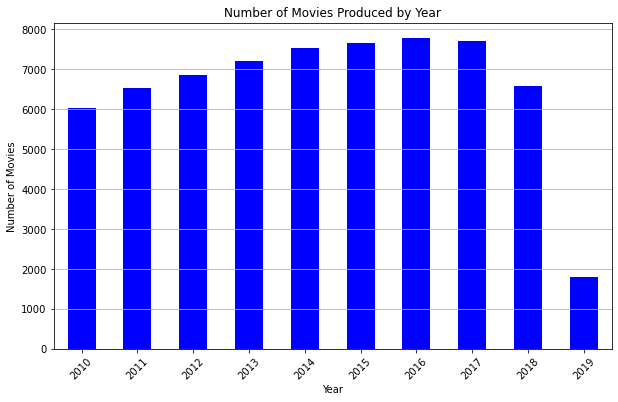

In [24]:
# No. of Movies per year
movie_counts_by_year = imdb['start_year'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
movie_counts_by_year.plot(kind='bar', color='blue')
plt.title('Number of Movies Produced by Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45) 
plt.grid(axis='y')  
plt.show()

In [25]:
#Finding the most frequent rating of the top ranked movies (<7)
mode_value = imdb['averagerating'].mode()
mode_value

0    7.0
dtype: float64

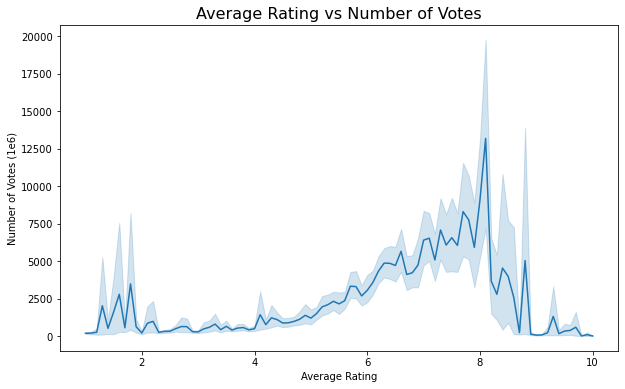

In [26]:
#Plot Average Ratings Vs Number of Votes
plt.figure(figsize=(10, 6))# Set the figure size
sns.lineplot(x='averagerating', y='numvotes', data= imdb)
plt.title("Average Rating vs Number of Votes", fontsize=16)  # Set the title of the plot
plt.xlabel("Average Rating")  # Label for the x-axis
plt.ylabel("Number of Votes (1e6)")  # Label for the y-axis

plt.show()

In [27]:
#Finding themost liked genre
genre_counts = imdb['genres'].value_counts()
most_popular_genre = genre_counts.idxmax()
most_popular_genre

'Drama'

In [28]:
#Finding the top 10 most liked genres
top_10_genres = imdb.groupby('genres')['averagerating'].mean().nlargest(10)
top_10_genres

genres
Comedy,Documentary,Fantasy     9.4
Documentary,Family,Musical     9.3
Game-Show                      9.0
Documentary,News,Reality-TV    8.8
Documentary,News,Sport         8.8
Drama,Short                    8.8
Action,Adventure,Musical       8.7
Adventure,Crime                8.5
Biography,History,Music        8.5
Music,Musical,Romance          8.4
Name: averagerating, dtype: float64

In [29]:
# Create an empty list to store the new rows
new_rows = []

# Iterate over each row in the DataFrame
for index, row in imdb.iterrows():
    # Split the 'genres' string by comma and iterate over the resulting list
    for genre in row['genres'].split(','):
        # Create a new row with the details from other columns and the current genre
        new_row = row.copy()
        new_row['genres'] = genre.strip()  # Strip leading/trailing whitespace
        new_rows.append(new_row)
# Create a new DataFrame from the list of new rows
df_individual_genres = pd.DataFrame(new_rows)

# Print the new DataFrame
print(df_individual_genres)

        movie_id                    primary_title     original_title  \
0      tt0063540                        Sunghursh          Sunghursh   
0      tt0063540                        Sunghursh          Sunghursh   
0      tt0063540                        Sunghursh          Sunghursh   
1      tt0066787  One Day Before the Rainy Season    Ashad Ka Ek Din   
1      tt0066787  One Day Before the Rainy Season    Ashad Ka Ek Din   
...          ...                              ...                ...   
73850  tt9913056                     Swarm Season       Swarm Season   
73851  tt9913084                 Diabolik sono io   Diabolik sono io   
73852  tt9914286                Sokagin Çocuklari  Sokagin Çocuklari   
73852  tt9914286                Sokagin Çocuklari  Sokagin Çocuklari   
73855  tt9916160                       Drømmeland         Drømmeland   

       start_year  runtime_minutes       genres  averagerating  numvotes  
0            2013            175.0       Action            7

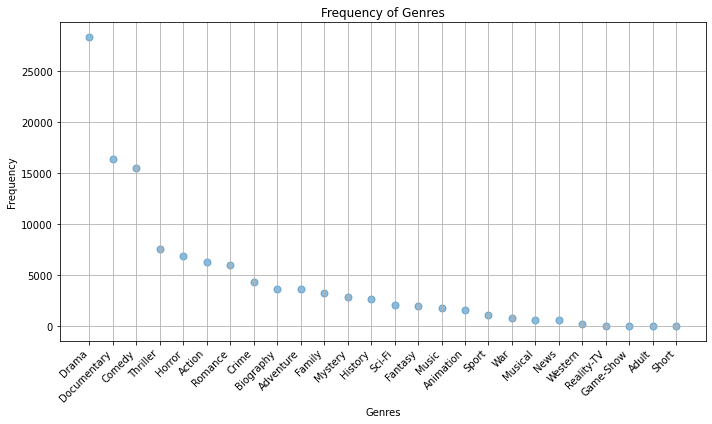

In [30]:
# Count the occurrences of each genre
genre_counts = df_individual_genres['genres'].value_counts()

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(genre_counts.index, genre_counts.values, s=50, alpha=0.5)
plt.title('Frequency of Genres')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

In [31]:
#checking no. of unique genres: 
unique_genres = imdb['genres'].unique()
len(unique_genres)

906

In [32]:
#We haven't listed since the number is too large.

2. BOX OFFICE MOVIES GROSS 

In [33]:
# 1.Data Extraction and Reading/Inspection (Box Office Movies Revenue)
df = pd.read_csv("bom.movie_gross.csv")    #Reading CSV File
df.head(3) #Display first 3 rows to confirm

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010


In [34]:
df.shape

(3387, 5)

In [35]:
df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [36]:
df.info

<bound method DataFrame.info of                                             title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0

In [37]:
#Let us view the head again
df.head(2)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


In [38]:
bom_missing_data = df.isnull().sum()
bom_missing_data

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [39]:
#Handling Missing Data
#filling in using mean

In [40]:
mean_domestic= df['domestic_gross'].mean()
df['domestic_gross'].fillna(mean_domestic, inplace=True)

In [41]:
mean_foreign= df['foreign_gross'].mean()
df['foreign_gross'].fillna(mean_foreign, inplace=True)

TypeError: can only concatenate str (not "int") to str

In [ ]:
df.dropna(subset=['studio'], inplace=True)

In [ ]:
bom_missing_data = df.isnull().sum()
bom_missing_data

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [ ]:
bom_df = df
bom_df.head(2)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010


These analyses will provide insights into trends in movie production, box office performance, and studio success. 

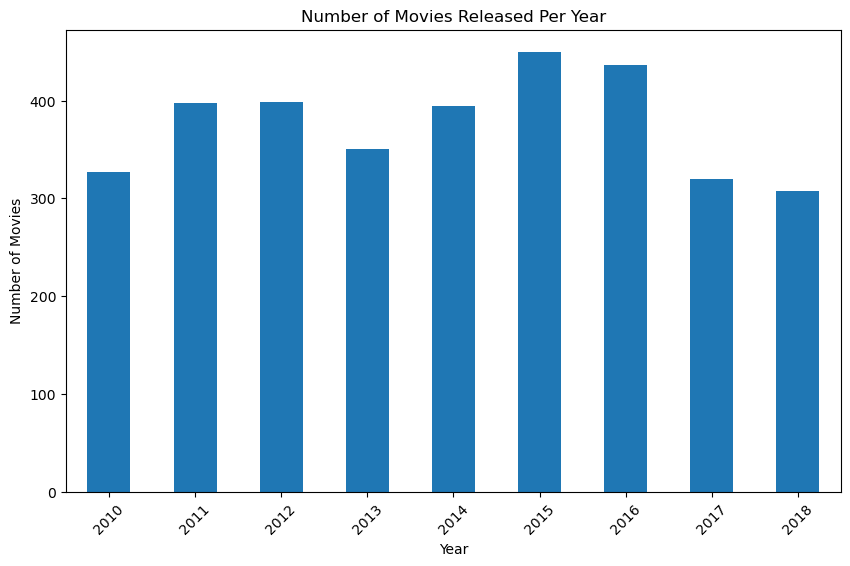

In [ ]:
#Number of Movies Released Per Year
# Count the number of movies released each year
movies_per_year = bom_df['year'].value_counts().sort_index()

# Plot the number of movies released per year
plt.figure(figsize=(10, 6))
movies_per_year.plot(kind='bar')
plt.title('Number of Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()


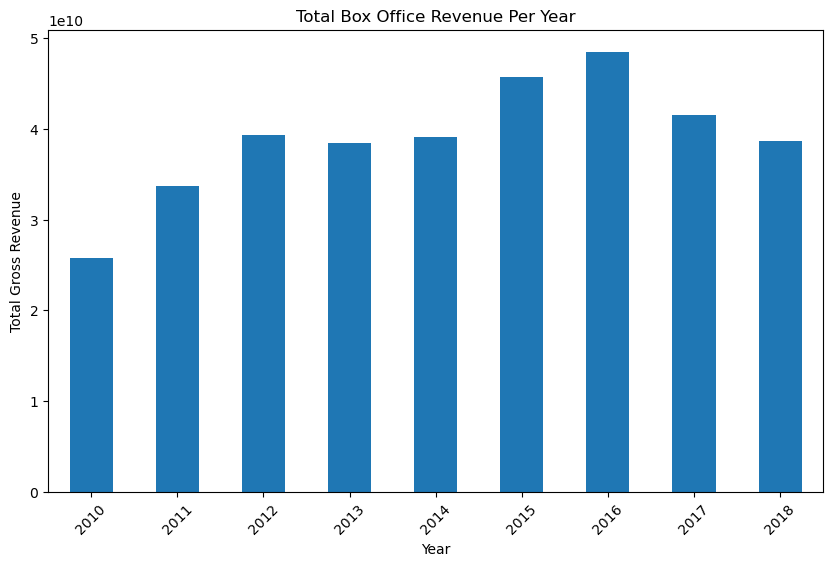

In [ ]:
#Total Box Office Revenue Per Year
df['total_gross'] = df['domestic_gross'] + df['foreign_gross']
total_gross_per_year = df.groupby('year')['total_gross'].sum()

# Plot total box office revenue per year
plt.figure(figsize=(10, 6))
total_gross_per_year.plot(kind='bar')
plt.title('Total Box Office Revenue Per Year')
plt.xlabel('Year')
plt.ylabel('Total Gross Revenue')
plt.xticks(rotation=45)
plt.show()


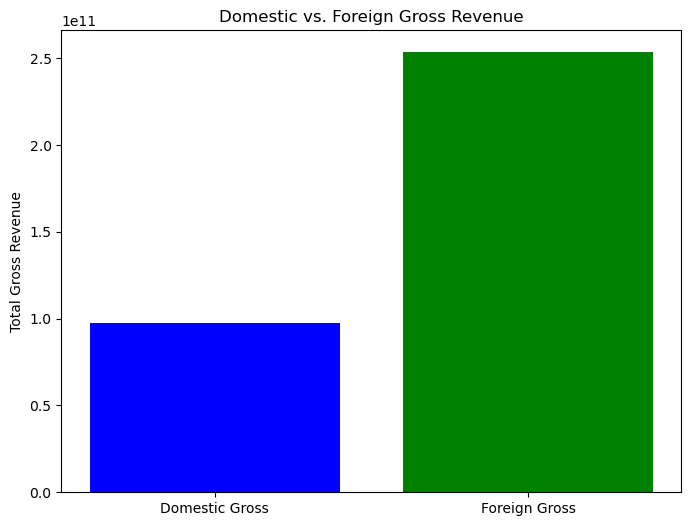

In [ ]:
# Domestic vs. Foreign Gross
total_domestic_gross = df['domestic_gross'].sum()
total_foreign_gross = df['foreign_gross'].sum()

# Plot domestic vs. foreign gross
plt.figure(figsize=(8, 6))
plt.bar(['Domestic Gross', 'Foreign Gross'], [total_domestic_gross, total_foreign_gross], color=['blue', 'green'])
plt.title('Domestic vs. Foreign Gross Revenue')
plt.ylabel('Total Gross Revenue')
plt.show()

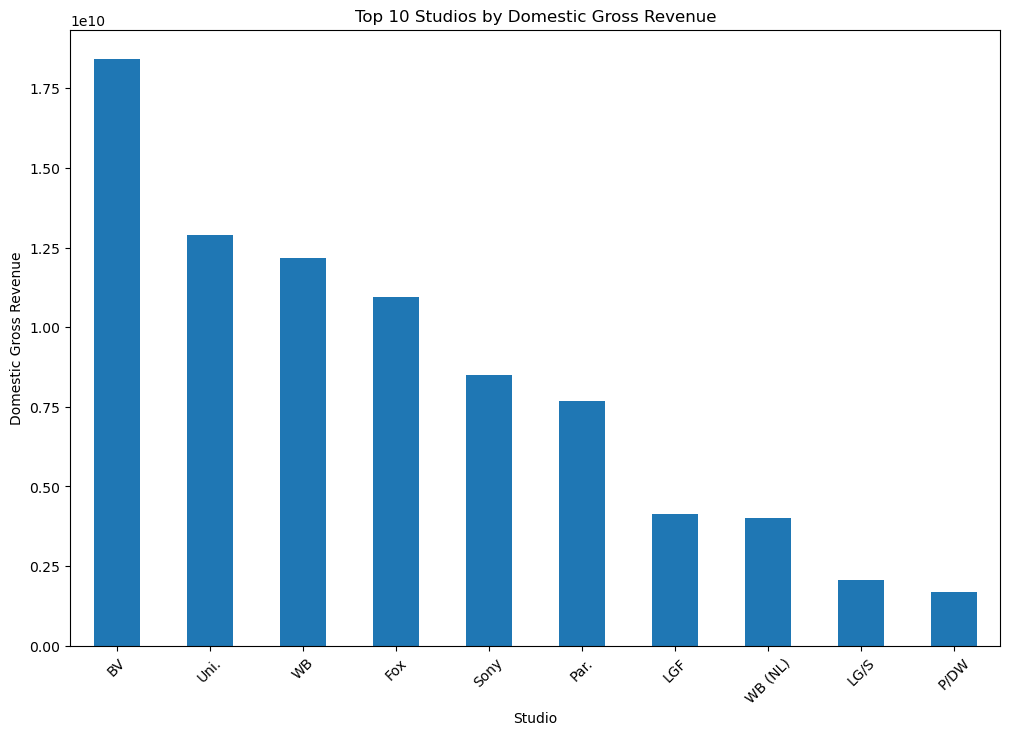

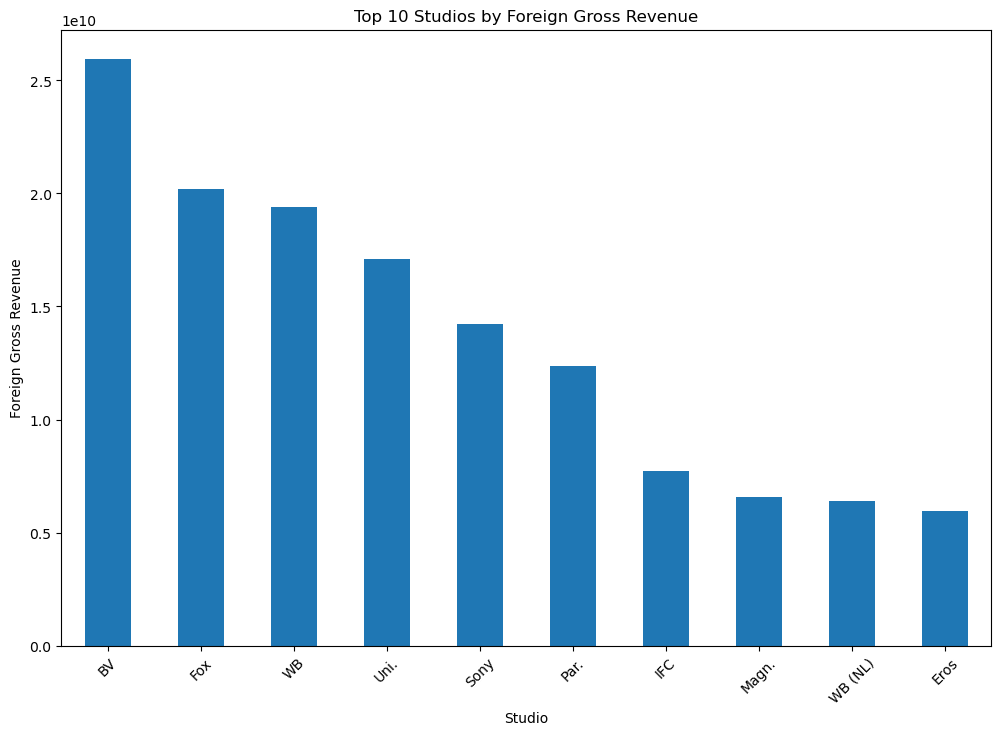

In [ ]:
#Studio Performance
studio_domestic_gross = df.groupby('studio')['domestic_gross'].sum().sort_values(ascending=False)
studio_foreign_gross = df.groupby('studio')['foreign_gross'].sum().sort_values(ascending=False)

# Plot top 10 studios by domestic gross
plt.figure(figsize=(12, 8))
studio_domestic_gross.head(10).plot(kind='bar')
plt.title('Top 10 Studios by Domestic Gross Revenue')
plt.xlabel('Studio')
plt.ylabel('Domestic Gross Revenue')
plt.xticks(rotation=45)
plt.show()

# Plot top 10 studios by foreign gross
plt.figure(figsize=(12, 8))
studio_foreign_gross.head(10).plot(kind='bar')
plt.title('Top 10 Studios by Foreign Gross Revenue')
plt.xlabel('Studio')
plt.ylabel('Foreign Gross Revenue')
plt.xticks(rotation=45)
plt.show()

3. ROTTEN TOMATOES

In [ ]:
rotten_t_info.head(2)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,9-Oct-71,25-Sep-01,NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,17-Aug-12,1-Jan-13,$,"600,000",108 minutes,Entertainment One


In [ ]:
rotten_t_info.shape

(1560, 12)

In [ ]:
rotten_t_info.info

<bound method DataFrame.info of         id                                           synopsis rating  \
0        1  This gritty, fast-paced, and innovative police...      R   
1        3  New York City, not-too-distant-future: Eric Pa...      R   
2        5  Illeana Douglas delivers a superb performance ...      R   
3        6  Michael Douglas runs afoul of a treacherous su...      R   
4        7                                                NaN     NR   
...    ...                                                ...    ...   
1555  1996  Forget terrorists or hijackers -- there's a ha...      R   
1556  1997  The popular Saturday Night Live sketch was exp...     PG   
1557  1998  Based on a novel by Richard Powell, when the l...      G   
1558  1999  The Sandlot is a coming-of-age story about a g...     PG   
1559  2000  Suspended from the force, Paris cop Hubert is ...      R   

                                                  genre            director  \
0                   Acti

In [ ]:
rotten_t_info.describe()

,id
count,1560.000000
mean,1007.303846
std,579.164527
min,1.000000
25%,504.750000
50%,1007.500000
75%,1503.250000
max,2000.000000


In [ ]:
rti_df_missing_data = rotten_t_info.isnull().sum()
rti_df_missing_data

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
 box_office     1220
runtime           30
studio          1066
dtype: int64

In [ ]:
#Handling Missing Data
cleaned_data = rotten_t_info.dropna()

In [ ]:
rti_df_missing_data = cleaned_data.isnull().sum()
rti_df_missing_data


id              0
synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
currency        0
 box_office     0
runtime         0
studio          0
dtype: int64

In [ ]:
cleaned_data.shape

(235, 12)

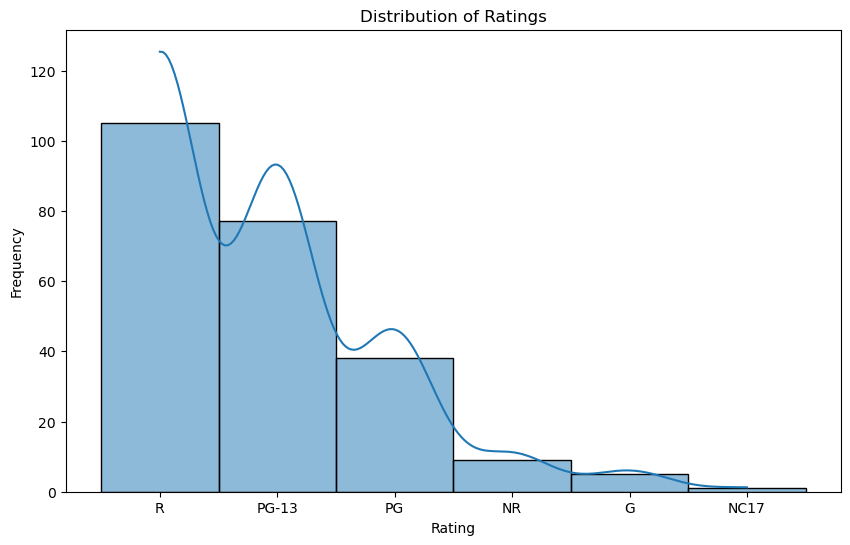

In [ ]:
#Rating Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=cleaned_data, x ='rating', bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

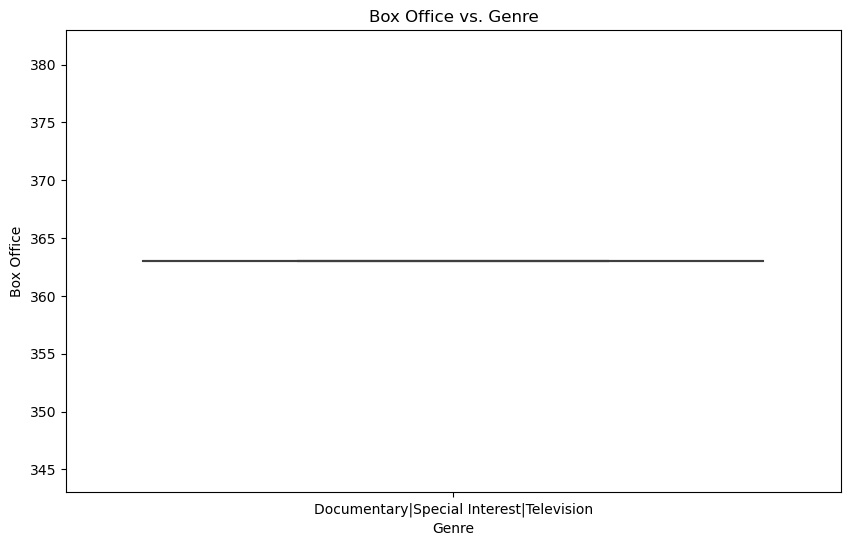

In [ ]:
#Box Office vs Genre Distribution
cleaned_data[' box_office '] = pd.to_numeric(cleaned_data[' box_office '], errors='coerce')

# Remove rows with missing values in 'box_office' column
cleaned_data = cleaned_data.dropna(subset=[' box_office '])

# Genre Distribution - Using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_data, x='genre', y =' box_office ')
plt.title('Box Office vs. Genre')
plt.xlabel('Genre')
plt.ylabel('Box Office')
plt.show()

In [ ]:
print(cleaned_data.columns)

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', ' box_office ', 'runtime',
       'studio'],
      dtype='object')


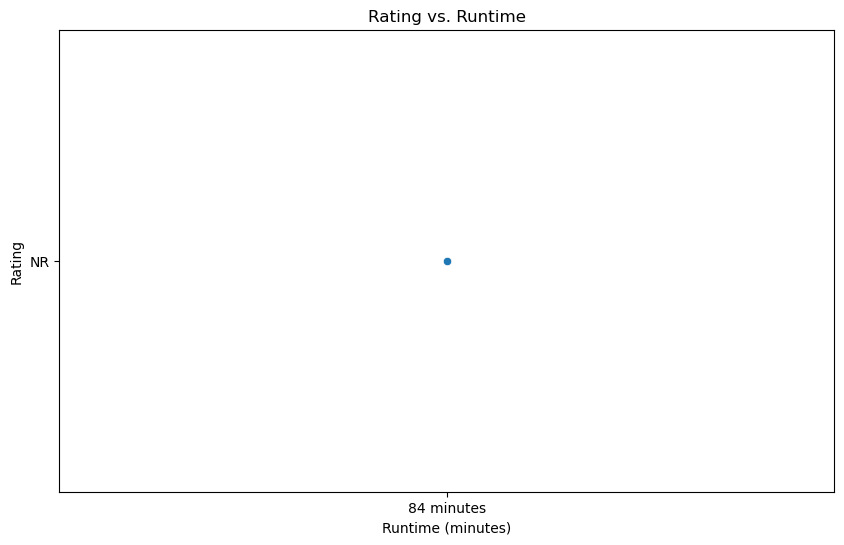

In [ ]:
# Rating vs. Runtime - Using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleaned_data, x='runtime', y='rating')
plt.title('Rating vs. Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Rating')
plt.show()

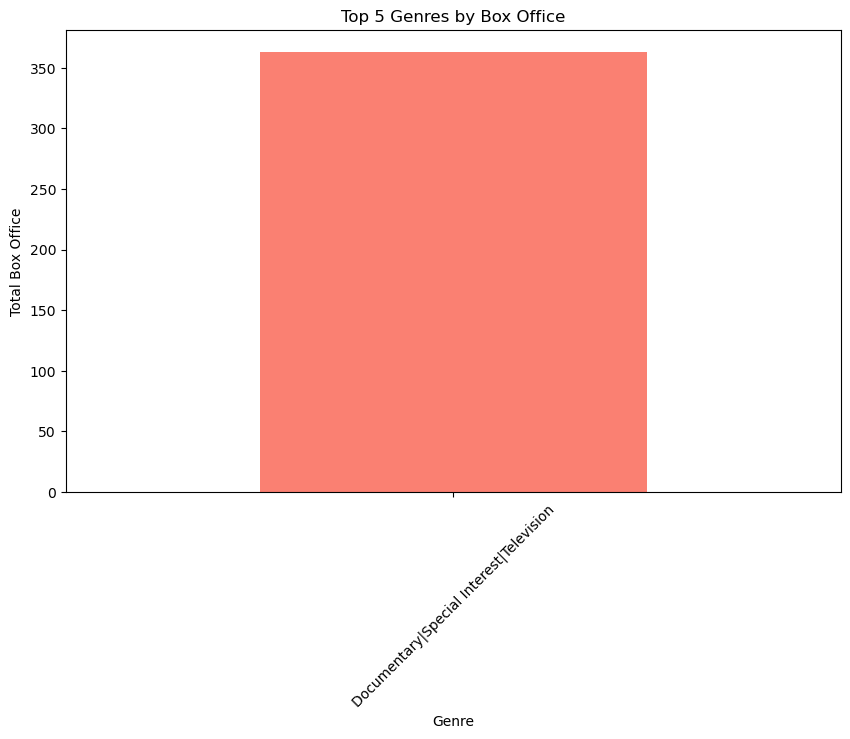

In [ ]:
# Top 5 Genres by Box Office - Using Pandas
top_genres = cleaned_data.groupby('genre')[' box_office '].sum().nlargest(5)
plt.figure(figsize=(10, 6))
top_genres.plot(kind='bar', color='salmon')
plt.title('Top 5 Genres by Box Office')
plt.xlabel('Genre')
plt.ylabel('Total Box Office')
plt.xticks(rotation=45)
plt.show()

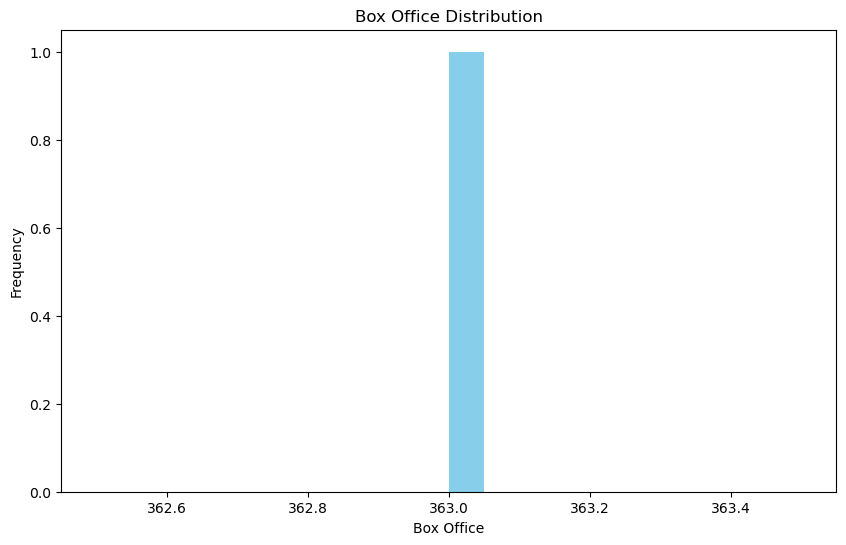

In [ ]:
# Box Office Distribution - Using Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(cleaned_data[' box_office '], bins=20, color='skyblue')
plt.title('Box Office Distribution')
plt.xlabel('Box Office')
plt.ylabel('Frequency')
plt.show()

4. ROTTEN TOMATOES REVIEWS

In [ ]:
rotten_t_reviews.head(2)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"


In [ ]:
the_numbers.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,18-Dec-09,Avatar,425000000,760507625,2776345279
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875


In [ ]:
tmdb.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,18-Dec-09,Avatar,425000000,760507625,2776345279
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875


In [ ]:
#Data Analysis and Summary (BOM Movies Gross)
df.shape #No of (Rows, Colums)


(3382, 5)

In [ ]:
df.describe() #This gives a summary of the Incomes and Year

,domestic_gross,foreign_gross,year
count,3.382000e+03,3.382000e+03,3382.000000
mean,2.877129e+07,7.492216e+07,2013.959787
std,6.674880e+07,1.066075e+08,2.477735
min,1.000000e+02,6.000000e+02,2010.000000
25%,1.230000e+05,1.170000e+07,2012.000000
50%,1.400000e+06,7.487281e+07,2014.000000
75%,2.874585e+07,7.487281e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


In [ ]:
#New Column
df["total_gross"] = df["domestic_gross"] + df["foreign_gross"]
df.head(3)

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08


In [ ]:
df.info() #Summary of the DF (No Missing Value)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3382 non-null   float64
 3   foreign_gross   3382 non-null   float64
 4   year            3382 non-null   int64  
 5   total_gross     3382 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 185.0+ KB


In [ ]:
df.describe()

,domestic_gross,foreign_gross,year,total_gross
count,3.382000e+03,3.382000e+03,3382.000000,3.382000e+03
mean,2.877129e+07,7.492216e+07,2013.959787,1.036934e+08
std,6.674880e+07,1.066075e+08,2.477735,1.616122e+08
min,1.000000e+02,6.000000e+02,2010.000000,4.900000e+03
25%,1.230000e+05,1.170000e+07,2012.000000,2.730000e+07
50%,1.400000e+06,7.487281e+07,2014.000000,7.493321e+07
75%,2.874585e+07,7.487281e+07,2016.000000,7.884781e+07
max,9.367000e+08,9.605000e+08,2018.000000,1.518900e+09


In [ ]:
# 2.Data Extraction and Reading/Inspection (ROTTEN TOMATOES INFO)
df = pd.read_csv('rt.movie_info.tsv', sep='\t') #Reading TSV File
df.head(3) #Display first 3 rows to confirm

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,9-Oct-71,25-Sep-01,NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,17-Aug-12,1-Jan-13,$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,13-Sep-96,18-Apr-00,NaN,NaN,116 minutes,NaN


In [ ]:
#Data Analysis and Summary (ROTTEN TOMATOES INFO)
df.shape #(Rows, Columns)

(1560, 12)

In [ ]:
df.info() #No Null Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9    box_office   340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [ ]:
# Remove non-numeric characters from column "runtime"
df['runtime'] = df['runtime'].replace({'[^0-9]': ''}, regex=True)
df.head(2)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,9-Oct-71,25-Sep-01,NaN,NaN,104,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,17-Aug-12,1-Jan-13,$,"600,000",108,Entertainment One


In [ ]:
#Convert date to match other data sources dates for ease of comparison and compatibility
df['theater_date'] = pd.to_datetime(df['theater_date'], format='%d-%b-%y').dt.year
df['dvd_date'] = pd.to_datetime(df['dvd_date'], format='%d-%b-%y').dt.year
df.head(2)


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971.0,2001.0,NaN,NaN,104,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012.0,2013.0,$,"600,000",108,Entertainment One


In [ ]:
# 3.Data Extraction and Reading/Inspection (ROTTEN TOMATOES REVIEWS)
df = pd.read_csv("rt.reviews.tsv", sep='\t', encoding='cp1252') #Reading TSV File
df.head(3) #Display first 3 rows to confirm

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"


In [ ]:
#Data Analysis and Summary (ROTTEN TOMATOES REVIEWS)
df.shape #(Rows, Columns)

(54432, 8)

In [ ]:
df.info() #No Null Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [ ]:
df.describe()

,id,top_critic
count,54432.000000,54432.000000
mean,1045.706882,0.240594
std,586.657046,0.427448
min,3.000000,0.000000
25%,542.000000,0.000000
50%,1083.000000,0.000000
75%,1541.000000,0.000000
max,2000.000000,1.000000


In [ ]:
# 2. Data Extraction and Reading (IMDB)
conn = sqlite3.connect('im.db') #Connecting to the IMDB database
query = "SELECT * FROM movie_basics" #Sample query data from the database to ensure we can read the Database
df = pd.read_sql_query(query, conn)

conn.close() #Closing the database connection to ensure the data we are querrying stays as it is. 

df.head(3) #To confirm we have read the DataFrame

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama


Based on the visualizations and data analysis, here are three concrete business recommendations for Microsoft as they venture into the film industry:

1. Focus on High-Grossing Genres
Recommendation: Invest in producing movies in genres that have historically performed well at the box office, such as Action, Adventure, and Animation.

Rationale:

The box plot of "Box Office Gross by Genre" shows that genres like Action, Adventure, and Animation tend to have higher domestic grosses.
These genres are popular among a wide audience and have a proven track record of profitability, making them safer investments for a new studio.
2. Prioritize Quality: Target High-Rated Genres
Recommendation: Aim to produce high-quality films in genres that receive higher average ratings, such as Drama, Documentary, and Animation.

Rationale:

The bar plot of "Average Ratings by Genre" indicates that Drama, Documentary, and Animation genres tend to have higher average ratings.
High-quality films in these genres can build a strong reputation for the studio, attract critical acclaim, and ensure long-term audience loyalty.
Animation appears in both high-grossing and high-rated categories, suggesting it as a particularly strong genre to focus on.
3. Strategic Budget Allocation
Recommendation: Allocate a diverse range of budgets across different projects, ensuring that some resources are dedicated to lower-budget films with potential high returns, while also investing in big-budget blockbusters.

Rationale:

The histogram of "Distribution of Movie Budgets" reveals a wide range of budget allocations across successful films.
Big-budget films (e.g., high-profile Action and Adventure movies) can drive massive box office returns and global reach.
Lower-budget films, especially in genres like Horror and Thriller, often yield high returns on investment due to lower production costs and niche audience appeal.
This balanced approach mitigates risk and maximizes potential for both high-grossing hits and profitable smaller projects.
Supporting Insights
Yearly Trends:

Recommendation: Monitor trends in box office gross over the years to identify emerging patterns and preferences.
Rationale: The line plot of "Box Office Gross by Year" can help identify trends and cyclical patterns in audience preferences, aiding in strategic planning and marketing efforts.
Audience Analysis:

Recommendation: Leverage data from platforms like IMDB and Rotten Tomatoes to understand audience demographics and preferences.
Rationale: Detailed audience insights can guide targeted marketing campaigns and content strategies, ensuring that films resonate with intended viewers.
Additional Considerations
Innovation and Originality:

Encourage creative storytelling and innovative film-making techniques to stand out in a competitive market.
Embrace diverse narratives and unique perspectives to capture a broad and inclusive audience base.
Technology and Streaming Integration:

Invest in technology to enhance production quality and integrate seamlessly with streaming platforms for wider distribution.
Consider producing exclusive content for Microsoft’s own platforms, leveraging its existing digital ecosystem.
Partnerships and Collaborations:

Form strategic partnerships with established directors, writers, and production companies to leverage their expertise and market presence.
Collaborate with popular franchises and IPs to attract existing fanbases and ensure initial traction.
By focusing on these areas, Microsoft can strategically enter the film industry with a well-rounded approach, leveraging data-driven insights to guide their decision-making and maximize their chances of success.